<a href="https://colab.research.google.com/github/FVRDaniel/Calculation-of-Learning-Evaluation-Metrics/blob/main/Calculation_of_Learning_Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
tf.__version__
'2.0.0-beta1'

'2.0.0-beta1'

In [ ]:
%load_ext tensorboard

In [ ]:
logdir='log'

In [ ]:
(train_images, train_labels),(test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape ((60000, 28, 28, 1))
test_images = test_images.reshape ((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8947 - loss: 0.3404 - val_accuracy: 0.9828 - val_loss: 0.0517
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9850 - loss: 0.0485 - val_accuracy: 0.9851 - val_loss: 0.0441
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0341 - val_accuracy: 0.9872 - val_loss: 0.0370
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9911 - val_loss: 0.0265
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9937 - loss: 0.0197 - val_accuracy: 0.9918 - val_loss: 0.0271


In [ ]:
y_true=test_labels
y_pred=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
classes=[0,1,2,3,4,5,6,7,8,9]

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Fazer previsões
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Gerar a matriz de confusão
confusion_matrix = tf.math.confusion_matrix(test_labels, predicted_labels)

313/313 - 1s - 2ms/step - accuracy: 0.9918 - loss: 0.0271

Test accuracy: 0.9918000102043152
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


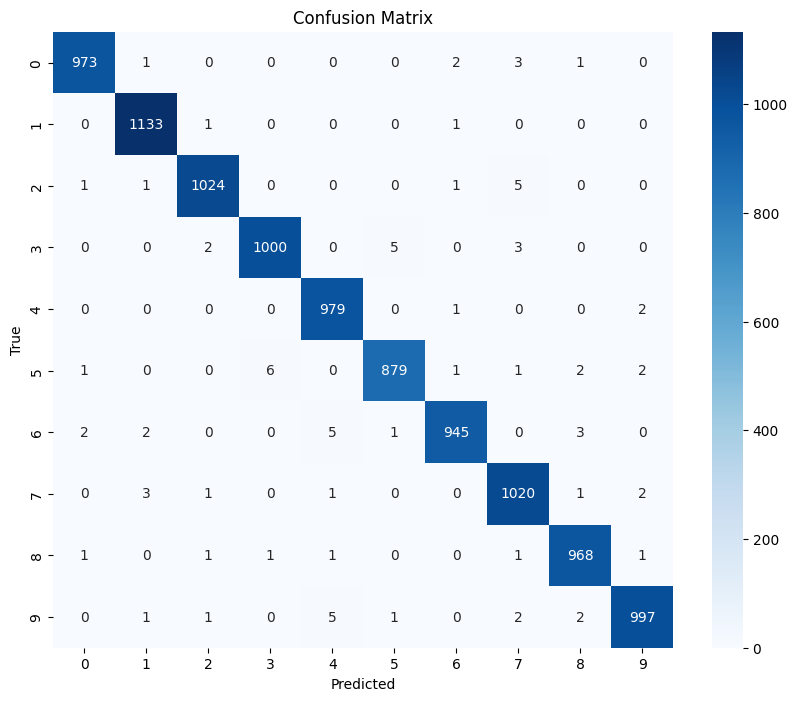

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, predicted_labels)


In [ ]:
VP = np.diag(conf_matrix)
FP = conf_matrix.sum(axis=0) - VP
FN = conf_matrix.sum(axis=1) - VP
VN = conf_matrix.sum() - (VP + FP + FN)

In [ ]:
sensibilidade = VP / (VP + FN)
especificidade = VN / (FP + VN)
acuracia = (VP + VN) / conf_matrix.sum()
precisao = VP / (VP + FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

In [ ]:
for i in range(len(classes)):
    print(f'Classe {classes[i]}:')
    print(f'Sensibilidade: {sensibilidade[i]:.2f}')
    print(f'Especificidade: {especificidade[i]:.2f}')
    print(f'Acurácia: {acuracia[i]:.2f}')
    print(f'Precisão: {precisao[i]:.2f}')
    print(f'F-score: {f_score[i]:.2f}')
    print('-' * 30)

Classe 0:
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.99
F-score: 0.99
------------------------------
Classe 1:
Sensibilidade: 1.00
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.99
F-score: 1.00
------------------------------
Classe 2:
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.99
F-score: 0.99
------------------------------
Classe 3:
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.99
F-score: 0.99
------------------------------
Classe 4:
Sensibilidade: 1.00
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.99
F-score: 0.99
------------------------------
Classe 5:
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.99
F-score: 0.99
------------------------------
Classe 6:
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.99
F-score: 0.99
------------------------------
Classe 7:
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.99
F-score: 0.99
-----------------------